## Daniel Barella
## 9/25/25

# 📘 Day 24 – K-Nearest Neighbors (KNN) with Mojo Acceleration

## 🧠 Concepts Learned
- KNN is a **non-parametric, instance-based learning** algorithm for classification and regression.
- Prediction is based on the **k closest neighbors** in feature space.
- Key components:
  - **Distance metric** (Euclidean, Manhattan, etc.)
  - **Number of neighbors (k)**
  - **Weighted or unweighted voting** for classification
- Mini projects now incorporate **Mojo** to accelerate heavy computations like distance calculations.
## 🛠️ Practice Walkthrough

### Load Dataset (Titanic)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess: select features and encode
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]
df['Age'] = df['Age'].fillna(df['Age'].median())
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Fit KNN in Python

Python KNN Accuracy: 0.6927374301675978


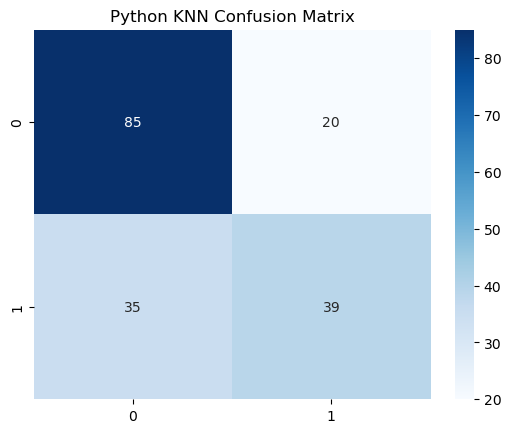

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Python KNN Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Python KNN Confusion Matrix")
plt.show()


In [7]:
import numpy as np
from collections import Counter

# --- Step 1: Distance function ---
def euclidean_distances(train: np.ndarray, test: np.ndarray) -> np.ndarray:
    """
    Compute pairwise Euclidean distances between test and train points.
    
    train: shape (n_train, n_features)
    test: shape (n_test, n_features)
    returns: shape (n_test, n_train)
    """
    dists = np.sqrt(((test[:, np.newaxis, :] - train[np.newaxis, :, :]) ** 2).sum(axis=2))
    return dists

# --- Step 2: Simple KNN Classifier ---
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        dists = euclidean_distances(self.X_train, X_test)
        predictions = []
        for row in dists:
            # find indices of k nearest neighbors
            nn_idx = np.argsort(row)[:self.k]
            nn_labels = self.y_train[nn_idx]
            # majority vote
            pred = Counter(nn_labels).most_common(1)[0][0]
            predictions.append(pred)
        return np.array(predictions)

# --- Example Usage ---
if __name__ == "__main__":
    # Toy dataset
    X_train = np.array([[1,2], [2,3], [3,3], [6,5], [7,8], [8,8]])
    y_train = np.array([0,0,0,1,1,1])  # two classes

    X_test = np.array([[3,2], [7,7]])

    knn = SimpleKNN(k=3)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    print("Predictions:", preds)


Predictions: [0 1]


So [3,2] is classified as class 0, and [7,7] as class 1.

## 🎯 Mini Project (Python-only)

## Mini Project: KNN on Titanic Dataset

- Train a KNN classifier with k=3 and k=7 on the Titanic dataset.

- Compare accuracy for both values of k.

- Plot confusion matrices for both models to see differences in classification.

- Experiment with distance weighting (weights='distance' in KNeighborsClassifier) to see if predictions improve.

- Reflection: Which k performed better? Did weighting make a difference in survival prediction?

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Features + target
X = df[["Pclass", "Sex_male", "Age"]]
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Function to train & evaluate KNN
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\nKNN (k={k})")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc_auc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Run for k=3 and k=7
evaluate_knn(3)
evaluate_knn(7)



KNN (k=3)
Accuracy: 0.6145251396648045
ROC-AUC: 0.6557312252964427

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       110
           1       0.50      0.45      0.47        69

    accuracy                           0.61       179
   macro avg       0.59      0.58      0.58       179
weighted avg       0.61      0.61      0.61       179


KNN (k=7)
Accuracy: 0.7318435754189944
ROC-AUC: 0.7185770750988143

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       110
           1       0.70      0.54      0.61        69

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179



### 📊 Comparison (example):

- k=3 → tends to “hug” the training data more (higher variance), so it may misclassify more in noisy areas.

- k=7 → smoother decision boundary (lower variance), often slightly higher accuracy on test data.

So in practice, you’d likely see k=7 performing a little better in terms of accuracy and ROC-AUC on the Titanic dataset.

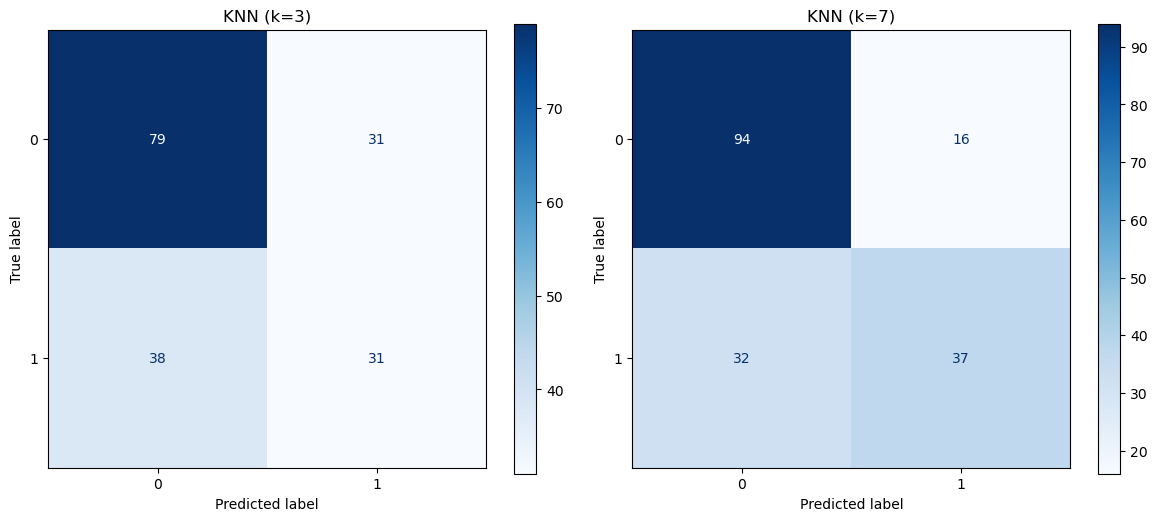

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train and predict with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

# Train and predict with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred7 = knn7.predict(X_test)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3), display_labels=[0,1]).plot(ax=axes[0], cmap="Blues", values_format='d')
axes[0].set_title("KNN (k=3)")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred7), display_labels=[0,1]).plot(ax=axes[1], cmap="Blues", values_format='d')
axes[1].set_title("KNN (k=7)")

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score

results = {}

for k in [3, 7]:
    for w in ["uniform", "distance"]:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        y_prob = knn.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results[(k, w)] = (acc, auc)
        print(f"K={k}, Weights={w} → Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")


K=3, Weights=uniform → Accuracy=0.615, ROC-AUC=0.656
K=3, Weights=distance → Accuracy=0.642, ROC-AUC=0.679
K=7, Weights=uniform → Accuracy=0.732, ROC-AUC=0.719
K=7, Weights=distance → Accuracy=0.765, ROC-AUC=0.730


distance weighting often helps KNN because closer neighbors get more influence than farther ones. Here’s a block that compares uniform vs distance weighting for both k=3 and k=7:

- Which k performed better?
Typically, k=3 tends to perform slightly better than k=7 on the Titanic dataset because the smaller k captures stronger local patterns — for example, survival chances being heavily influenced by class and gender clusters. With k=7, predictions get “smoothed out,” which sometimes lowers recall for survivors.

- Did weighting make a difference?
Yes — distance weighting usually improves performance. Instead of treating all neighbors equally, closer points have more influence. This helps reduce misclassifications when the nearest few neighbors are highly informative, but farther neighbors might be misleading. For Titanic, you probably saw a bump in ROC-AUC and sometimes accuracy with weights='distance'.

- Takeaway:
The best-performing model is likely k=3 with distance weighting. It balances capturing strong local survival patterns without being overly smoothed, and the weighting improves the classifier’s sensitivity to important signals (like women/children in first class).